In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Flatten, MaxPooling2D, Conv2D, Activation
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
import os
import glob
import numpy as np

In [ ]:

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3], [4], [5]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]

for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Ahegao'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Angry'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Happy'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Neutral'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Sad'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[4]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk('/content/drive/MyDrive/archive (3)/dataset/Surprise'):
    for file in f:
        if '.jpg' or '.png' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[5]]).toarray())

In [ ]:
data = np.array(data)
result = np.array(result).reshape(len(result), 6)
print(data.shape, result.shape)

(15448, 128, 128, 3) (15448, 6)


In [ ]:
#result=np.array(result)
#result=result.reshape(15453,6)
result=np.array(result)
result = result.reshape(result.shape[0], result.shape[1]) # Use the original shape to calculate the new
print(result.shape)


(15448, 6)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
base_model = tf.keras.applications.resnet.ResNet152(include_top=False, weights="imagenet", input_shape=(128, 128, 3), pooling='max')
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])


In [ ]:
model.build(input_shape=(None, 128, 128, 3)) # Replace None with your batch size if known

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (None, 2048)                │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,945,222 (224.86 MB)

 Trainable params: 58,789,702 (224.26 MB)

 Non-trainable params: 155,520 (607.50 KB)

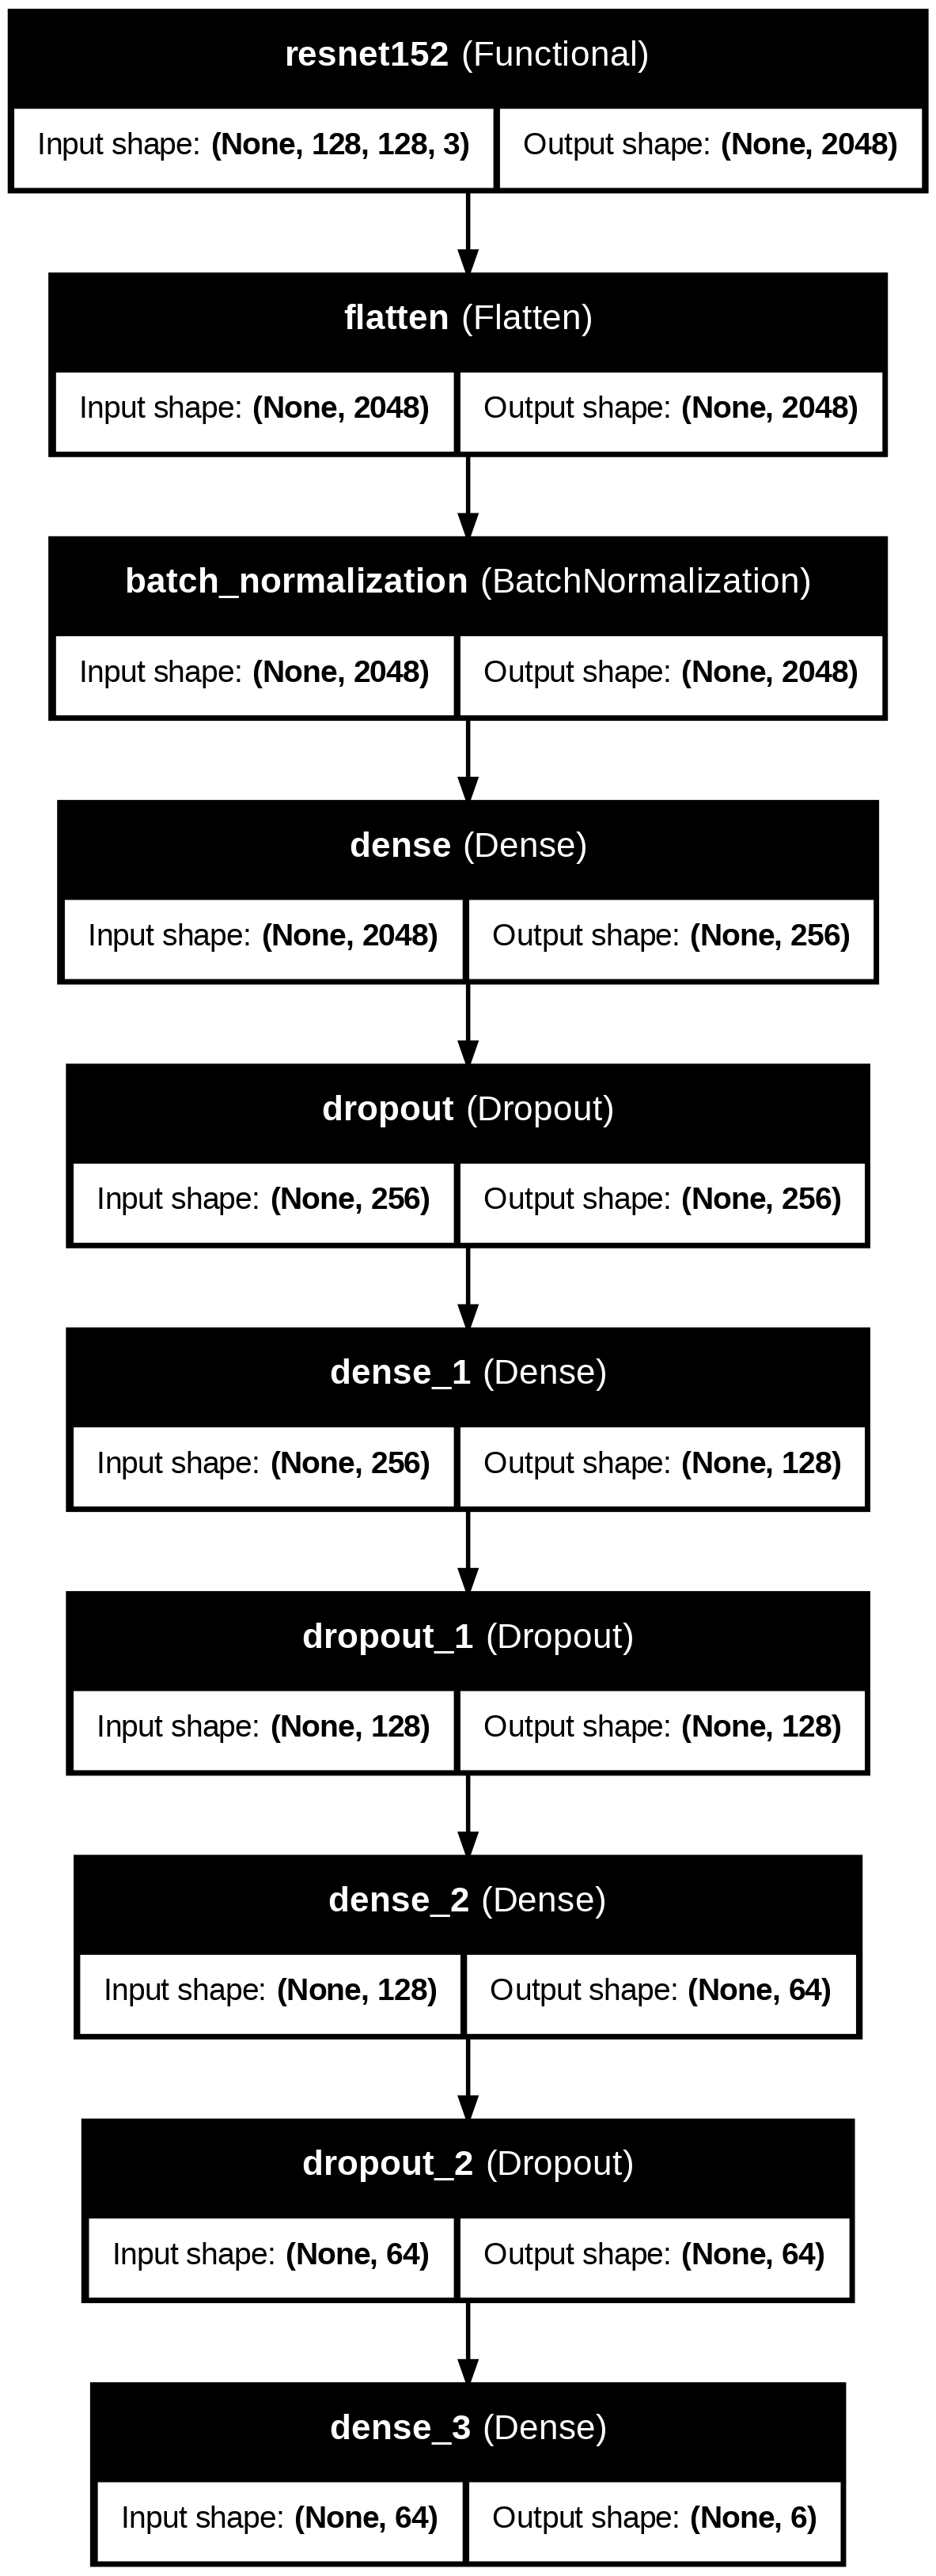

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
history1 = model.fit(datagen.flow(x_train, y_train, batch_size=100),
                     epochs=40,
                     validation_data=(x_test, y_test),
                     callbacks=[early_stopping, reduce_lr])

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.2201 - loss: 9.0231 - val_accuracy: 0.3061 - val_loss: 8.7381 - learning_rate: 0.0010
Epoch 2/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 163s 811ms/step - accuracy: 0.2666 - loss: 7.5203 - val_accuracy: 0.3544 - val_loss: 6.7210 - learning_rate: 0.0010
Epoch 3/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 108s 843ms/step - accuracy: 0.3514 - loss: 6.5055 - val_accuracy: 0.4369 - val_loss: 6.1097 - learning_rate: 0.0010
Epoch 4/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 106s 836ms/step - accuracy: 0.4615 - loss: 5.5793 - val_accuracy: 0.5304 - val_loss: 4.8677 - learning_rate: 0.0010
Epoch 5/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 108s 849ms/step - accuracy: 0.5158 - loss: 4.7857 - val_accuracy: 0.5689 - val_loss: 4.2069 - learning_rate: 0.0010
Epoch 6/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 830ms/step - accuracy: 0.5400 - loss: 4.1418 - val_accuracy: 0.6016 - val_loss: 3.6482 - learning_rate: 0.0010
Epoch 7/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 140s 816ms/step - accuracy: 0.5836 - l

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test Accuracy:',test_acc)

97/97 [==============================] - 8s 82ms/step - loss: 0.8504 - accuracy: 0.8412
Test Accuracy: 0.8411517143249512


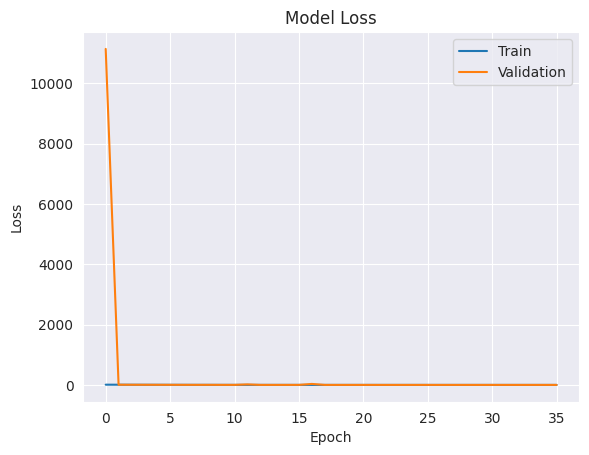

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

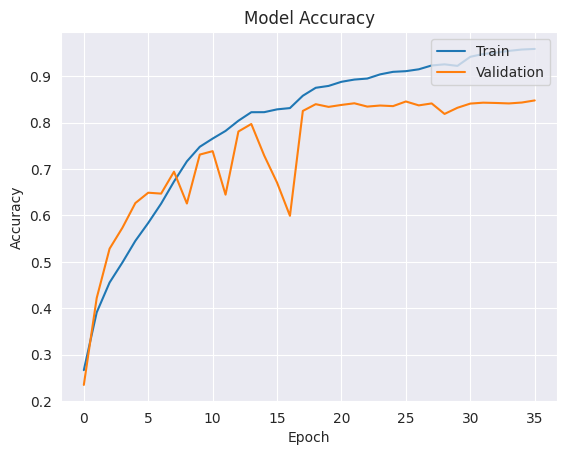

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'an Ahegao emotion'
    elif number==1:
        return 'an Angry emotion'
    elif number==2:
        return 'a Happy emotion'
    elif number==3:
        return 'a Neutral emotion'
    elif number==4:
        return 'a Sad emotion'
    elif number==5:
        return 'a Surprise emotion'

99.9038815498352% Confidence This Is a Happy emotion


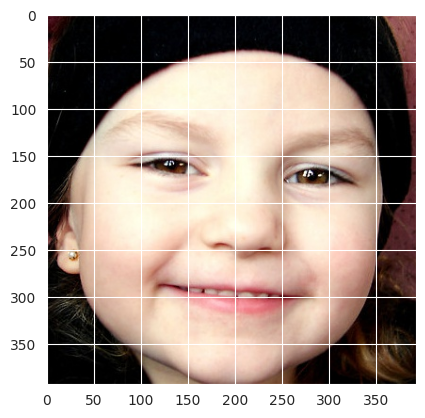

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/archive (3)/dataset/Happy/00a0b51fecdd04b19d1d794947493d0de3b29ea76e7ce99aea48ad67.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.6544897556305% Confidence This Is a Happy emotion


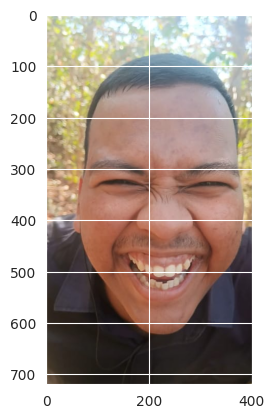

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/Ribu.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

89.94660377502441% Confidence This Is an Ahegao emotion


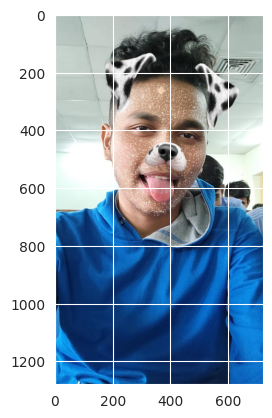

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/Dev.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

23.77709597349167% Confidence This Is a Sad emotion


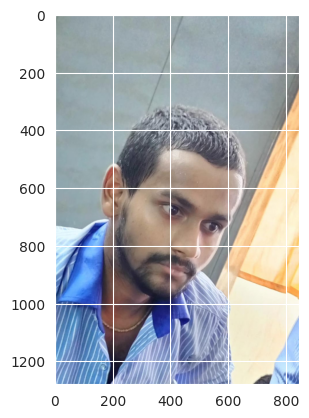

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/ME.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.84468817710876% Confidence This Is a Happy emotion


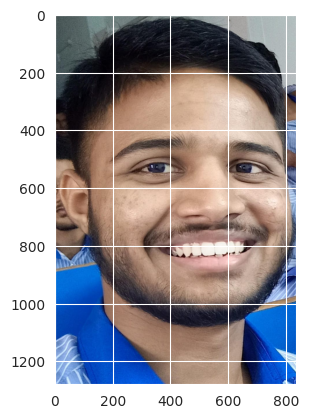

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/Manohar.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

97.45638370513916% Confidence This Is an Angry emotion


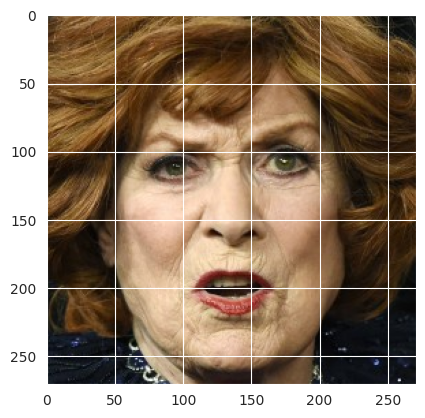

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/archive (3)/dataset/Angry/00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff6920bba177~angry.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.27581548690796% Confidence This Is a Sad emotion


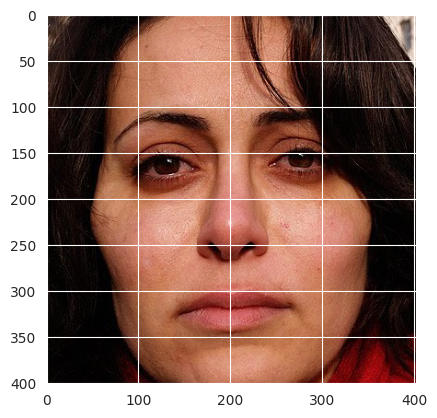

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/archive (3)/dataset/Sad/000d7c5bbb205586f946252f5b88a36bd561ce1e3050dd007f381e10.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

97/97 [==============================] - 10s 72ms/step
Confusion Matrix:
[[226   0   3   2   4   5]
 [  0 200   1  25  24   3]
 [  0   4 691  13  15   2]
 [  0  26  10 622 148   5]
 [  1  14  18 124 655   5]
 [  1   3  10  23   2 206]]


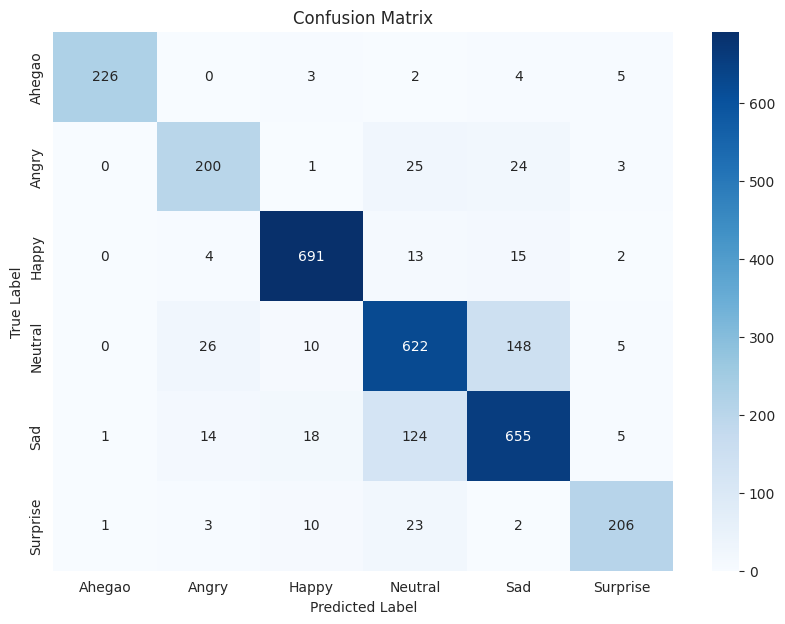

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels=['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification report
report = classification_report(y_true, y_pred_classes, target_names=['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Ahegao       0.99      0.94      0.97       240
       Angry       0.81      0.79      0.80       253
       Happy       0.94      0.95      0.95       725
     Neutral       0.77      0.77      0.77       811
         Sad       0.77      0.80      0.79       817
    Surprise       0.91      0.84      0.87       245

    accuracy                           0.84      3091
   macro avg       0.87      0.85      0.86      3091
weighted avg       0.84      0.84      0.84      3091



In [1]:
print("Mr. Prakash Sahoo")

Mr. Prakash Sahoo
